In [6]:
# Code by Bhavy Kharbanda
# Sap Id: 500082531 
# Write a program to implement 8-Puzzle problem.

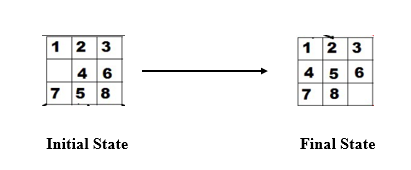

In [5]:
# Importing the libraries.
from IPython.display import Image

Image(filename='Puzzle_8.png') 

In [8]:
# Code by Bhavy Kharbanda
# Sap Id: 500082531 
# Write a program to implement 8-Puzzle problem.

# 8 puzzle is a game where we have to arrange 8 title in a sequence (1,2,3,4,5,6,7,8,blank_tite) fitted in 3*3 matrix Initially title may not be in sequence so we have to check where is blank tile, and we can swap blank tile with its adjacent tile After swapping is done we check have we reached our goal state if yes game end, else we continue swapping tiles We can define H(Heuristic value) like=Number of tile in correct place,this will keep track of how far we are away from our goal(h=8)

class Node:
    def __init__(self, data, level, fval):
        # Initialize the node with the data ,level of the node and the calculated fvalue
        self.data = data
        self.level = level
        self.fval = fval

    def generate_child(self):
        # Generate hild nodes from the given node by moving the blank space
        # either in the four direction {up,down,left,right}
        x, y = self.find(self.data, '_')
        # val_list contains position values for moving the blank space in either of
        # the 4 direction [up,down,left,right] respectively.
        val_list = [[x, y - 1], [x, y + 1], [x - 1, y], [x + 1, y]]
        children = []
        for i in val_list:
            child = self.shuffle(self.data, x, y, i[0], i[1])
            if child is not None:
                child_node = Node(child, self.level + 1, 0)
                children.append(child_node)
        return children

    def shuffle(self, puz, x1, y1, x2, y2):
        # Move the blank space in the given direction and if the position value are out
        # of limits the return None
        if x2 >= 0 and x2 < len(self.data) and y2 >= 0 and y2 < len(self.data):
            temp_puz = []
            temp_puz = self.copy(puz)
            temp = temp_puz[x2][y2]
            temp_puz[x2][y2] = temp_puz[x1][y1]
            temp_puz[x1][y1] = temp
            return temp_puz
        else:
            return None

    def copy(self, root):
        # copy function to create a similar matrix of the given node
        temp = []
        for i in root:
            t = []
            for j in i:
                t.append(j)
            temp.append(t)
        return temp

    def find(self, puz, x):
        # Specifically used to find the position of the blank space
        for i in range(0, len(self.data)):
            for j in range(0, len(self.data)):
                if puz[i][j] == x:
                    return i, j


class Puzzle:
    def __init__(self, size):
        # Initialize the puzzle size by the the specified size,open and closed lists to empty
        self.n = size
        self.open = []
        self.closed = []

    def accept(self):
        # Accepts the puzzle from the user
        puz = []
        for i in range(0, self.n):
            temp = input().split(" ")
            puz.append(temp)
        return puz

    def f(self, start, goal):
        # Heuristic function to calculate Heuristic value f(x) = h(x) + g(x)
        return self.h(start.data, goal) + start.level

    def h(self, start, goal):
        # Calculates the difference between the given puzzles
        temp = 0
        for i in range(0, self.n):
            for j in range(0, self.n):
                if start[i][j] != goal[i][j] and start[i][j] != '_':
                    temp += 1
        return temp

    def process(self):
        # Accept Start and Goal Puzzle state
        print("Enter the start state matrix \n")
        start = self.accept()
        print("Enter the goal state matrix \n")
        goal = self.accept()
        start = Node(start, 0, 0)
        start.fval = self.f(start, goal)
        # put the start node in the open list
        self.open.append(start)
        print("\n\n")
        n=0
        while True:
            cur = self.open[0]
            print("==================================================\n")
           
            n = n+1
            for i in cur.data:
                for j in i:
                    print(j, end=" ")
                print("")
            # if the difference between current and goal node is 0 we have reached the goal node
            if (self.h(cur.data, goal) == 0):
                break
            for i in cur.generate_child():
                i.fval = self.f(i, goal)
                self.open.append(i)
            self.closed.append(cur)
            del self.open[0]
            # sort the open list based on f value
            self.open.sort(key=lambda x: x.fval, reverse=False)
            print("Number of Iteration: ",n)


puz = Puzzle(3)
puz.process()


Enter the start state matrix 

Enter the goal state matrix 





1 2 3 
_ 4 6 
7 5 8 
Number of Iteration:  1

1 2 3 
4 _ 6 
7 5 8 
Number of Iteration:  2

1 2 3 
4 5 6 
7 _ 8 
Number of Iteration:  3

1 2 3 
4 5 6 
7 8 _ 
